In [152]:
import numpy as np
import matplotlib.pyplot as plt

def draw_scatter(x, y):
    plt.scatter(x.ravel(), y.ravel())
    plt.show()

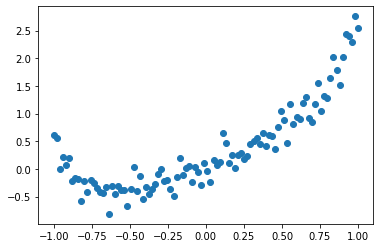

In [153]:
# 数据, 10组，每组一个特征
x = np.linspace(-1, 1, 100)[:, None]     # shape [100, 1]
y = np.random.normal(loc=0, scale=0.2, size=[100, 1]) + np.power(x, 6) + np.power(x, 5) / (5 * 4 * 3 * 2) + np.power(x, 4) / (4 * 3 * 2)+ np.power(x, 3) / (3 * 2) + np.power(x, 2) / 2 + np.power(x, 1)  # shape [100, 1]

draw_scatter(x, y)


In [154]:
x.shape, y.shape

((100, 1), (100, 1))

In [155]:
def scaling(X):
  return (X -np.min(X, 0)) / (np.max(X, 0) - np.min(X, 0)), np.max(X, 0), np.min(X, 0)

In [156]:
def sigmoid(X):
  return 1 / (1 + np.exp(- X))

$$ sigmoid(x) = \sigma(x) = \frac{1}{1 + e^{-x}} = \frac{e^x + 1 - 1}{e^x +1} = 1 - \frac{1}{e^x + 1}$$

$$ \sigma'{(x)} = - \frac{e^{x}}{(1 + e^{x})^2} = - \frac{e^{x} + 1 - 1}{(1 + e^{x})^2} $$

$$ = -\{\frac{1}{e^x +1} -\frac{1}{(e^x + 1)^2} \} = -\frac{1}{e^x +1} + \frac{1}{(e^x + 1)^2} $$

$$
\begin{aligned}
&若 f\left( x \right)=\frac{1}{x} ，则 f'\left( x \right)=-\frac{1}{x^{2}}\\
&若 g\left( x \right)=e^{x} ，则 g'\left( x \right)=e^{x}\\
&Sigmoid函数：\\
&S\left( x \right)=Sigmoid\left( x \right)=\frac{1}{1+e^{-x}}\\
&求导过程：\\
&S'\left( x \right)=-\frac{1}{(1+e^{-x})^2}\times(1+e^{-x})'=-\frac{1}{(1+e^{-x})^2}\times(-e^{-x})=\frac{1}{1+e^{-x}}\times\frac{e^{-x}}{1+e^{-x}}\\
&=\frac{1}{1+e^{-x}}\times\frac{1+e^{-x}-1}{1+e^{-x}}=S\left( x \right)(1-S\left( x \right))
\end{aligned}
$$

$$ Loss = -y*ln(a^{(2)})-(1-y*)ln(1-a^{(2)}) + \frac{1}{2}\lambda||W^{(1)}||^2 + \frac{1}{2}\lambda||W^{(2)}||^2 $$

$$
\begin{aligned}
&\delta^{(L)}=\frac{\Delta L}{\Delta z^L} = \frac{\Delta L}{\Delta a^L}\frac{\Delta a^L}{\Delta z^L}\\
&= \{- \frac{y}{a^{(2)}} + \frac{1-y}{1-a^{(2)}}\} \delta'(z^2) =\{ \frac{}{} \}
\end{aligned}
$$

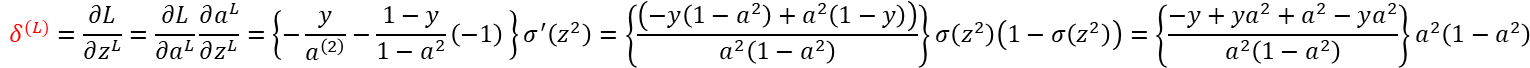

In [164]:
def wb_calc(xmat, ymat,lam=0,alpha=0.0001,maxIter=20000):
    m,n = xmat.shape

    np.random.seed(1)
    X = np.mat(np.zeros((m,m-1)))
    X[:,0] = xmat
    X[:,1] = xmat.A ** 2
    X[:,2] = xmat.A ** 3

    X, X_mean, X_std = scaling(X) # 优化的地方
    print('X_mean:',X_mean)
    print('X_std:',X_std)

    # init w b
    W = np.mat(np.random.randn(3,1))
    b = np.mat(np.random.randn(1,1))
    W0 = W.copy()
    b0 = b.copy()
    for i in range(maxIter):
        # dw, db
        H = X*W+b
        dw = 1/m * X.T*(H-ymat) + 1/m * lam*W
        #           (3,4)(4,1) + (3,1) = (3,1)
        db = 1/m * np.sum(H-ymat) #(1,1)

        # w,b update
        W -= alpha * dw
        b -= alpha * db
    return W,b,W0,b0,X_mean, X_std # return 多了几个

In [165]:
W,b,W0,b0,X_mean, X_std = wb_calc(x,y)

AttributeError: 'numpy.ndarray' object has no attribute 'A'

In [159]:
z1 = x*W1 + b1 # (20,2)(2,3) + (1,3) = (20,3)
a1 = sigmoid(z1) # (20,3)
z2 = a1*W2 + b2 # (20,3)(3,1) + (1,1) = (20,1)
a2 = sigmoid(z2) # (20,1)
loss = y - a2

/home/ebxeax/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


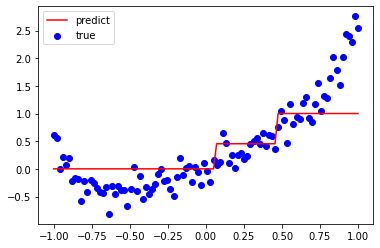

In [160]:
plt.plot(x, a2, "r-", label='predict')
plt.scatter(x, y, color='blue', marker='o', label='true')    # true data
plt.legend()
plt.show()